Name: Sushil Khanal

Course Title: Advanced Big Data and Data Mining

Lab Assignment Title: Lab 5: Clustering Techniques Using DBSCAN and Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch



In [2]:
# Step 1: Data Preparation and Exploration
# Load the dataset
wine = load_wine()
data = wine.data
feature_names = wine.feature_names
target = wine.target

# Convert to DataFrame
df = pd.DataFrame(data, columns=feature_names)

# Examine the dataset
print("Dataset Head:\n", df.head())
print("Dataset Info:\n")
df.info()
print("Dataset Description:\n", df.describe())



Dataset Head:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0   

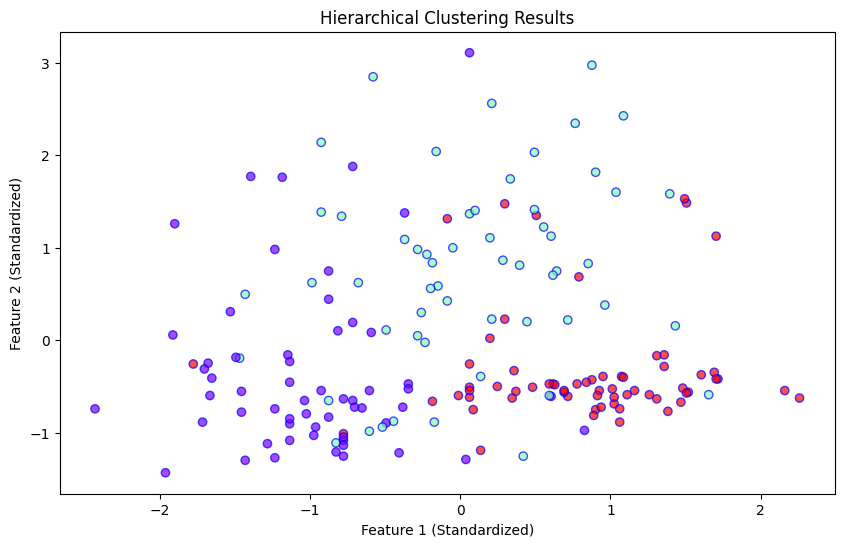

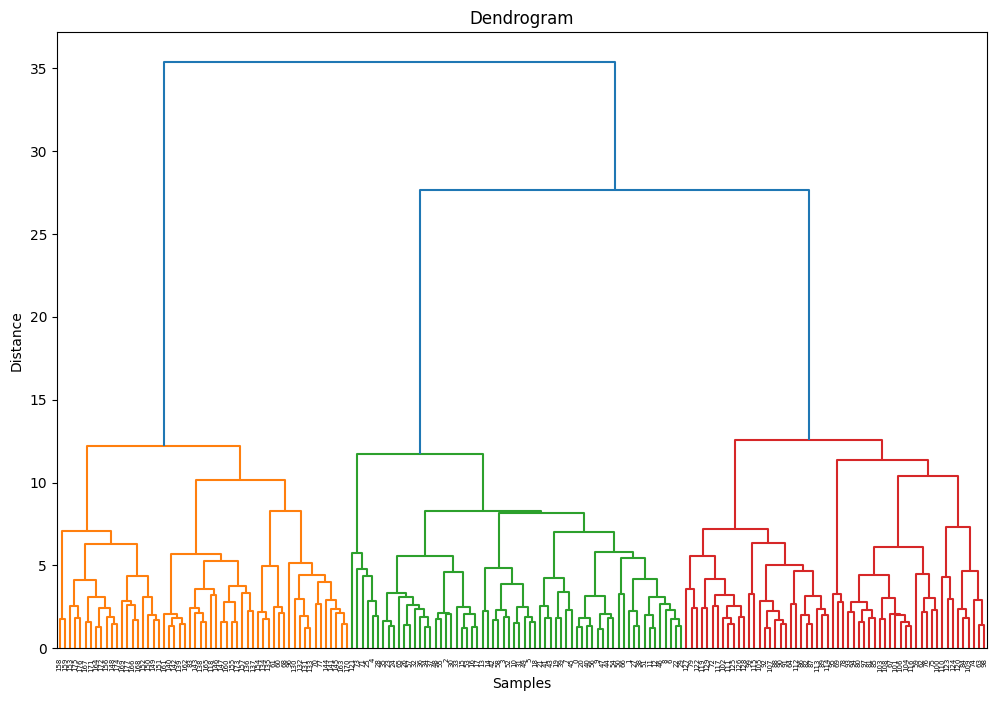

In [3]:
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: Hierarchical Clustering
# Apply Agglomerative Hierarchical Clustering
n_clusters = 3
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels_hierarchical = hierarchical_clustering.fit_predict(data_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_hierarchical, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

# Generate dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()



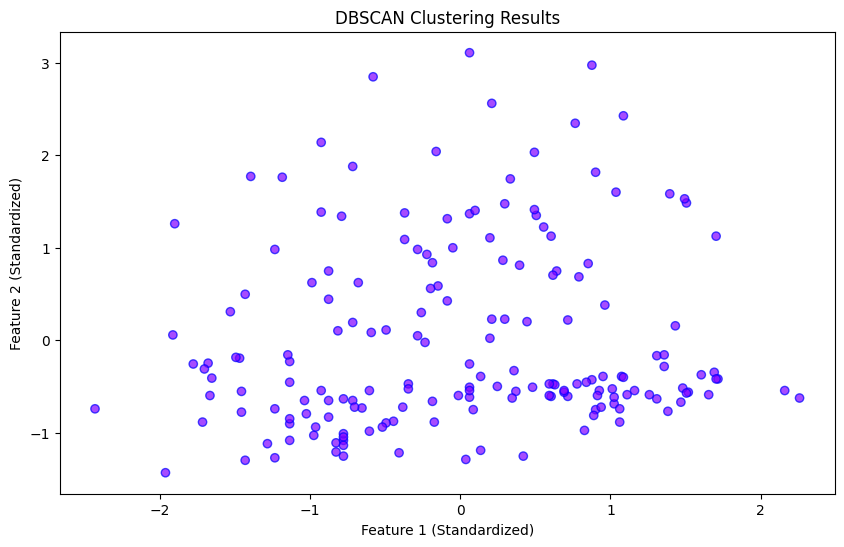

DBSCAN Evaluation Metrics:
Silhouette Score: nan
Homogeneity Score: nan
Completeness Score: nan


In [5]:
# Step 3: DBSCAN Clustering
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(data_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_dbscan, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.show()

# Compute evaluation metrics
silhouette = silhouette_score(data_scaled, labels_dbscan) if len(set(labels_dbscan)) > 1 else np.nan
homogeneity = homogeneity_score(target, labels_dbscan) if len(set(labels_dbscan)) > 1 else np.nan
completeness = completeness_score(target, labels_dbscan) if len(set(labels_dbscan)) > 1 else np.nan

print(f"DBSCAN Evaluation Metrics:\nSilhouette Score: {silhouette:.4f}\nHomogeneity Score: {homogeneity:.4f}\nCompleteness Score: {completeness:.4f}")



## Analysis and Insights
1. **Hierarchical Clustering**:
   - The codes above for hierarchical clustering generated evenly distributed clusters and visualized them in scatter plots and the dendrogram.
   - We have learned that Hierarchical clustering model is effective for datasets with clear hierarchical relationships.

2. **DBSCAN**:
   - DBSCAN was able to identify noise datapoints and clusters with irregular shapes.
   - However, it was highly sensitive to `eps` and `min_samples`. We also noted taht there is possibly issues of suboptimal parameters which led to clusters being undefined and metrics like Silhouette Score returning `NaN`.

3. **Comparative Insights**:
   - Comparing the two models revels that Hierarchical clustering is reliable for structured data and it is very easy to interpret with dendrograms.
   - On the other hand, DBSCAN is most suitable for datasets with noise or varying densities despite the issue with parameters choice.

4. **Conclusion**:
   - We therefore conclude that Hierarchical clustering is better choice when dealing with structured and evenly distributed datasets and DBSCAN is more effective when handling noise and irregular clusters. 
